1. [XgBoost - Classification](#xgboost---classification)

#### XgBoost - Classification:
- designed to use for large, complicated and complex datasets
- uses similarity score and information gain to build the tree
- use γ to prune the trees
- use α as learning rate
- use λ as regularization parameter
- 0.5 constant is chosen as the output of 1st weak learner (base model)

- the loss function used for classification is the same as gradient boosting classification loss function i.e. log(likelihood)

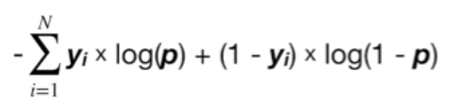

In [28]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/log_likelihood1.png')
new_image = img.resize((450, 110))
display(new_image)

- the finalized loss function as per gradient descent for classification is shown below

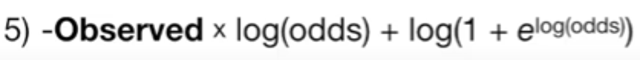

In [35]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/log_odds4.png')
new_image = img.resize((640, 60))
display(new_image)

- consider, we are comparing one of the feature from dataset (dosage) with probability of drug effectiveness(Yes/No). 
    - we also have other features as Age and Sex
- one of the feature is numerical and output is binary 
- at first irrespective of classification or regression, we choose the predicted drug effectiveness as 0.5
    - we could also evalulate the predicted probability for "Y" or "1" = 2/4 (based on the input data) => 0.5
    - if we have 5 data points, the predicted probability for "Y" or "1" = 3/5 (based on the input data) => 0.6
- similar to xgboost for regression, we evaluate the loss function (shown above) for the predicted value of the base learner (0.5)

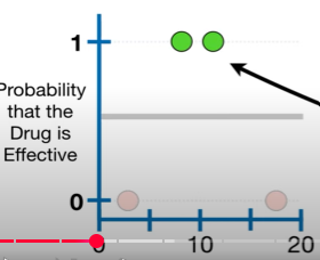

In [5]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/data.png')
new_image = img.resize((320, 260))
display(new_image)

- now calculate the residuals i.e. observed values - predicted value (0.5)

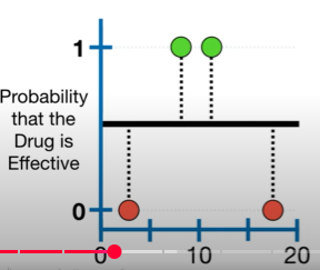

In [9]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/residual_class.png')
new_image = img.resize((320, 270))
display(new_image)

- we build the xgboost tree which is different from the regular regression decision tree using the similarity score & Information Gain
- similarity score = (Σ(Residuals)^2)/((p * (1-p)) + λ)
    - p = Previous probability
    - λ = regularization parameter

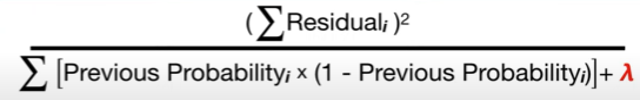

In [10]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/similarity_score_class.png')
new_image = img.resize((640, 100))
display(new_image)

- Before calculating the similarity score, we peform discretization by taking the last two values w.r.t drug dosage (feature) and take their average to perform the split
    - value = 15

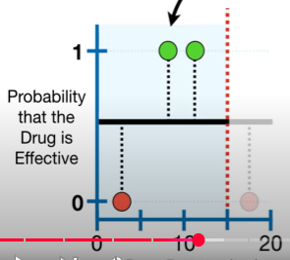

In [13]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/similarity_class.png')
new_image = img.resize((290, 260))
display(new_image)

- now, we calculate the similarity score for feature Dosage (root, intermediate nodes i.e. leaf nodes in this example)
    - calculate the similarity score for root (λ=0) = (-0.5+0.5+0.5-0.5)^2/(0.5 * 0.5) + (0.5 * 0.5) + (0.5 * 0.5) +0 => 0
    - calculate the similarity score for internal node 1 (λ=0) = (-0.5+0.5+0.5)^2/0.75 => 0.33
    - calculate the similarity score for internal node 2 (λ=0) = (-0.5)^2/0.25 => 1
- now, calculate the information gain
    - Information Gain(Dosage) = SS(node1) + SS(node2) - SS(root) = 0.33 + 1 - 0 => 1.33

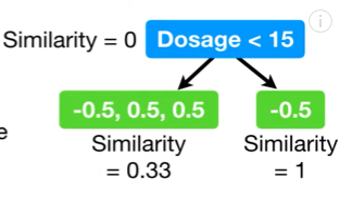

In [14]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/similarity_score_root_class.png')
new_image = img.resize((340, 200))
display(new_image)

- likewise, now, we repeat the discretization process for the next two values iteratively and found no Information Gain greater than the value = 15
- now, we choose the remaining feature and evaluate the information gain
- after comparing all the features and their information gain
    - we found the dosage information gain to have the highest information gain value so we chose dosage as the root node

- similar to xgboost regression, we calculate the loss function for base learner based on the initial prediction (0.5)
- to find the optimal output value, we evaluate the loss function for different lambda value 

- now, we can increase the value of λ from 0
- As we increase the λ value in the similarity score, we get a lower score
    - especially if we have many residuals associated to the node and with the increase in lambda value, the decrease in similarity score is high compared to having lower number of residuals 
    - w.r.t loss function similar to xgboost regression,
        - as we increase the lambda function, the output values get closer to zero i.e. it reduces the similarity scores and the respective information gain as shown below


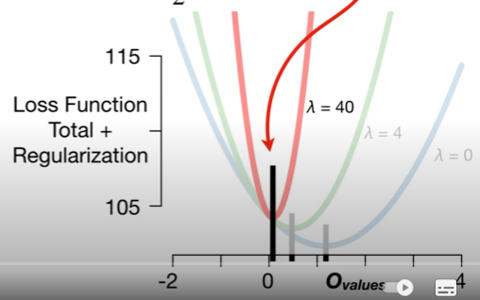

In [32]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/lambda_values.png')
new_image = img.resize((480, 300))
display(new_image)

- the output value for the terminal regions of classification is calculated via 2nd order taylor polynomial function

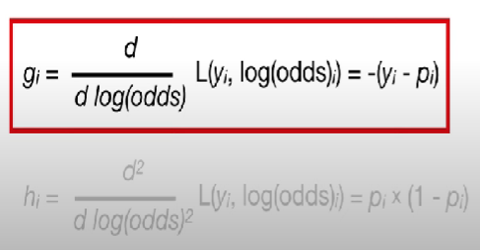

In [34]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/loss_function_class.png')
new_image = img.resize((480, 250))
display(new_image)

- we use the same output formula calculated for regression into classiication as well

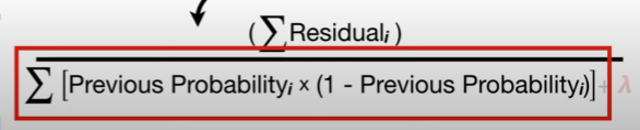

In [31]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/output_class.png')
new_image = img.resize((640, 130))
display(new_image)

- the output calculated from the leaf nodes w.r.t log(odds)
    - the output residuals from the built tree
        - = (Σ(Residuals))/((p * (1-p)) + λ)

- now, we can prune the trees via γ value
    - e.g:
        - prune trees if Information Gain - γ results in -ve value
            - we keep prunning trees until we meet a +ve value
        - do not prune trees if Information Gain - γ results in +ve value
            - if we have +ve value for internal nodes but the root node is -ve, we do not prune the tree
- we can also limit the building of the tree upto a certain depth level, default depth levels = 6
- the minimum number of residuals in each leaves is determined by calculating the cover value
    - the cover value = p * (1-p) i.e. previous probability (0.5)
        - default cover value = 1
            - if we want to modify the cover value (use the min_child_weight parameter)
- since the trees are connected in series, we add the outputs from each tree
- however, in classification
    - we calculate the log(odds) value for predicted probability for base learner (0.5)
        - log(odds) = log(p/1-p) = log(0.5/0.5) = log(1) = 0
- now, while prediction
    - Model output = log(odds|base model) + α (learning rate=0.3, between 0-1) * (log(odds) of output leaf) 
    - Model output = 0 + 0.3 * -2 => -0.6

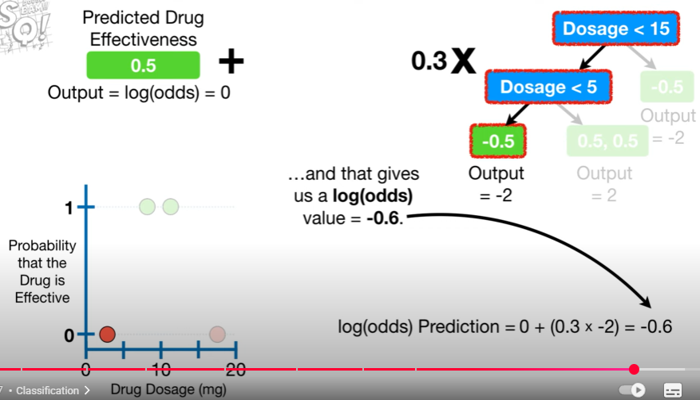

In [15]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/prediction_class.png')
new_image = img.resize((700, 400))
display(new_image)

- now convert the evaluated log(odds) value for model into probability
    - using the below formula
    - P(-0.6) => 0.35

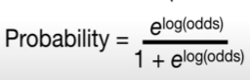

In [18]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/logistic_fn.png')
new_image = img.resize((250, 80))
display(new_image)

- we can see the residual has been improved from the previous base model of 0.5 predicted value

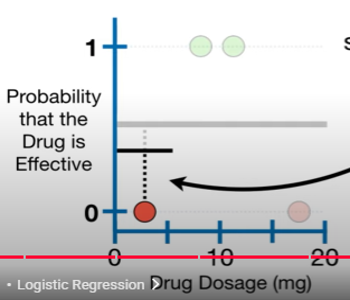

In [26]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/prediction_compare_class.png')
new_image = img.resize((350, 300))
display(new_image)

Optimizations of Xgboost:
- approximate greedy algorithm:
    - uses quantiles to choose the best split instead of going through each instance to find the split threshold
        - approximately uses 33 quantiles
            - parallel learning
            - weighted quantile sketch

- parallel learning
    - consider the large dataset is broken into several pieces of data and stored in different systems connected in the same network

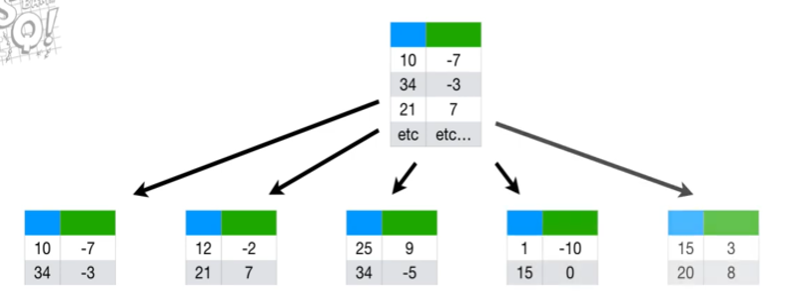

In [36]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/optimization2.png')
new_image = img.resize((800, 300))
display(new_image)

- weighted quantile sketch
    - when required, the data is gathered from all the systems and forms a histogram
    - then, the histogram is split into various quantiles
    - since quantiles supposed to have equal number of observations in each of it
        - but the histogram which is split earlier part of xgboost doesnt have equal observation, therefore, we take the weighted quantiles i.e. sum of weights of each quantile is the same and it is calculated via cover value 
        - weight is the 2nd derivative of the loss function
    - therefore for classification & Regression
        - Classification:
            - weight => p * (1-p) 
        - Regression:
            - weight = N => 1

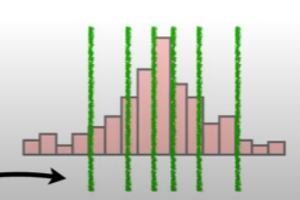

In [37]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/optimization3.png')
new_image = img.resize((300, 200))
display(new_image)

- sparsity aware split finding:
    - when we have a dataset with few missing values along with the records with all the values present
    - we create seperate table for records with missing values and without missing values w.r.t the feature we are trying to perform the split
    - first, we split the tree based on non missing values and then while performing calculation the gain on the left and the right, we add the residuals present for the missing values
        - for splitting the tree via discretization for numerical values as followed in decision tree algorithms
            - if its a large dataset, we would use quantiles for the split condition

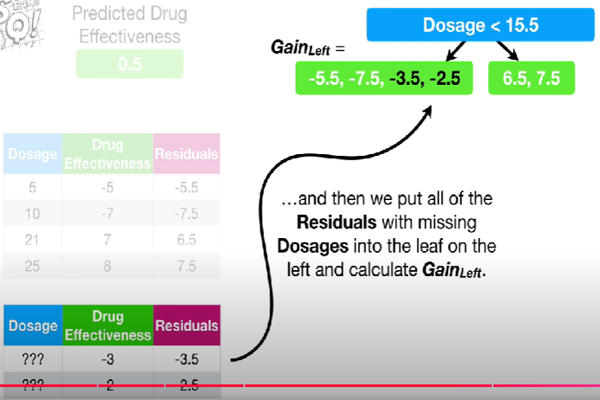

In [38]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/optimization.png')
new_image = img.resize((600, 400))
display(new_image)

- we choose the split for feature "dosage" with gain score the highest overall   
    - ensures that the missing values of the feature are assigned to a specific left or right node based on the split condition with highest gain score

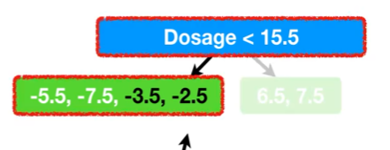

In [39]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/gain.png')
new_image = img.resize((390, 150))
display(new_image)

- Cache Aware Access:
    - the gradients and hessians is calculated in cache for similarity scores and output values
- Blocks out of core computation (Sharding):